In [1]:
#Importo las librerias necesarias para poder trabajar en el EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importo los 4 datasets con los que voy a trabajar asignandoles un nombre para diferenciarlos

df_dic_24 = pd.read_csv("datasets/listings_dic_24.csv")
df_mar_25 = pd.read_csv("datasets/listings_mar_25.csv")
df_jun_25 = pd.read_csv("datasets/listings_jun_25.csv")
df_sep_25 = pd.read_csv("datasets/listings_sep_25.csv")

In [3]:
print(df_dic_24.info())
print(df_mar_25.info())
print(df_jun_25.info())
print(df_sep_25.info())

# A pesar de que los datasets están obtenidos de la misma fuente de datos los reviso para ver como estan estructurados y si existen diferencias entre ellos 
# Al primer dataset (df_dic_24) le faltan 4 columnas respecto al resto, estas son: "estimated_revenue_l365d", "estimated_occupancy_l365d", "availability_eoy", "number_of_reviews_ly"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8699 entries, 0 to 8698
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8699 non-null   int64  
 1   listing_url                                   8699 non-null   object 
 2   scrape_id                                     8699 non-null   int64  
 3   last_scraped                                  8699 non-null   object 
 4   source                                        8699 non-null   object 
 5   name                                          8699 non-null   object 
 6   description                                   8446 non-null   object 
 7   neighborhood_overview                         4035 non-null   object 
 8   picture_url                                   8699 non-null   object 
 9   host_id                                       8699 non-null   i

In [4]:
# Compruebo que indican las columnas que tengo para ver que clase de datos me faltan

df_mar_25[["estimated_revenue_l365d", "estimated_occupancy_l365d", "availability_eoy", "number_of_reviews_ly"]]

# Para mi estudio estas columnas no son relevantes por lo que puedo prescindir de ellas

,estimated_revenue_l365d,estimated_occupancy_l365d,availability_eoy,number_of_reviews_ly
0,4290.0,30,4,5
1,13080.0,120,180,17
2,10560.0,88,172,14
3,7848.0,72,172,12
4,28140.0,210,243,24
...,...,...,...,...
8842,33264.0,216,233,35
8843,41820.0,255,223,77
8844,14280.0,168,39,33
8845,69368.0,184,237,24


In [5]:
# Voy revisando una a una las columnas para ver que datos me muestran y eligo con cuales me interesa trabajar para demostrar o desmentir mis hipotesis

df_dic_24.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
print(df_dic_24["id"].nunique())
print(len(df_dic_24["id"]))

# id es una columna que me interesa ya que es la referencia unica a cada alojamiento, esto me puede servir para analizar la evolución del precio de los mismos alojamientos

print(df_dic_24["price"][df_dic_24["id"] == 137143])
print(df_mar_25["price"][df_mar_25["id"] == 137143])

# Como he comprobado tanto en el dataset de dicimbre del 2024 como en el de marzo de 2025 existe el alojamiento con el mismo ID 
# Por tanto y como es lógico la columna price será imprescindible para poder trabajar con los datos 

8699
8699
1    $390.00
Name: price, dtype: object
1449    $390.00
Name: price, dtype: object


In [7]:
# host_id me interesa para identificar y relacionar los alojamientos con los propietarios de estos, es decir, puedo ver el numero de alojamientos por propietario

print(df_dic_24["host_id"].nunique())

# Como se puede ver en el dataset de diciembre hay 4014 propietarios 

print(df_dic_24["host_id"].value_counts())

# También podemos observar que la distribución de propiedades es desigual por lo que podemos seguir con nuestra hipótesis

len(df_mar_25[df_mar_25["host_id"] == 211991268])

# También podemos observar que para la misma referencia de host_id los dos datasets existen, además aqui vemos que el propietario 211991268 pasa de tener
# 79 alojamientos en diciembre del 2024 a 72 en marzo del 2025, por lo que nos dice almenos en este caso que el numero de propiedades es cambiante
# Esto claramente es un indicio de que es un propietario profesionalizado y nos da pie a ver la variabilidad entre diferentes grupos de propietarios para ver
# de que forma se distribuye el mercado de los alojamientos turisticos y cual es su dinámica


4014
host_id
134221412    196
417948112    147
83066665     115
211991268     79
123160301     69
            ... 
187136654      1
665181153      1
665038937      1
665000938      1
664597095      1
Name: count, Length: 4014, dtype: int64


72

In [8]:
# Para el estudio es imprecindible saber el número de propiedades que tiene cada propietario, para ello tenemos varias columnas que parecen indicarnoslo

df_dic_24[["host_listings_count","host_total_listings_count", "calculated_host_listings_count", "host_url"]]

# Host_listings_count nos muestra el numero total de alojamientos totales (fuera y dentro de València) que tienen los propietarios
# Para ello he utilizado la url del host que se encuentra en la columna host_url, y he accedido al perfil de Airbnb en el que nos muestra ese dato

# Por otro lado, calculated_host_listings_count refleja los alojamientos activos dentro de València, por lo que es la variable más interesante para el estudio en la ciudad.
# Nos permite saber con exactitud cuántos pisos tiene cada propietario publicados en València, y también nos ayuda a
# entender el grado de profesionalización: los hosts con muchos alojamientos en València suelen tener también más pisos fuera de la ciudad,
# mientras que los que tienen pocos pisos en València, normalmente no tendrán alojamientos fuera de la ciudad.

# Para poder comparar mas facilmente la evolución de las las mismas características de los DataFrames y  descubrir que es host_total_listings_count
# voy a crear un único DataFrame en el que se agrupen todos los datos que necesito evaluar

idhost = 134221412 

comprobacion_host_total_dic_24 = df_dic_24[df_dic_24["host_id"] == idhost].head(1)
comprobacion_host_total_mar_25 = df_mar_25[df_mar_25["host_id"] == idhost].head(1)
comprobacion_host_total_jun_25 = df_jun_25[df_jun_25["host_id"] == idhost].head(1)
comprobacion_host_total_sep_25 = df_sep_25[df_sep_25["host_id"] == idhost].head(1)

comprobacion_host_total = pd.concat([comprobacion_host_total_dic_24, comprobacion_host_total_mar_25, comprobacion_host_total_jun_25, comprobacion_host_total_sep_25], ignore_index=True)

comprobacion_host_total[["host_listings_count", "host_total_listings_count", "calculated_host_listings_count", "host_url"]]

# La columna host_total_listings_count indica el número total de alojamientos que tiene un propietario asociados a su perfil en Airbnb,
# incluyendo tanto los activos como los inactivos o pausados, es decir, todos los alojamientos visibles en la plataforma a fecha del dataset.
# Comparando diferentes propietarios he visto que esta cifra puede aumentar o disminuir, por lo que no refleja un histórico acumulado como pensaba al principio,
# sino un conteo puntual de la cuenta del propietario. 

# Este dato es muy útil para conocer la escala de operación de los multipropietarios frente a los propietarios únicos o de pocos alojamientos,
# ya que permite identificar a aquellos hosts que gestionan muchos anuncios en la plataforma aunque no todos estén activos, es decir tienen mayor influencia en el mercado.



,host_listings_count,host_total_listings_count,calculated_host_listings_count,host_url
0,205.0,254.0,196,https://www.airbnb.com/users/show/134221412
1,76.0,127.0,68,https://www.airbnb.com/users/show/134221412
2,78.0,133.0,77,https://www.airbnb.com/users/show/134221412
3,78.0,135.0,77,https://www.airbnb.com/users/show/134221412


In [9]:
# Para ver que columna me puede servir para ver a que barrio pertenece cada alojamiento,
# he visto la columna mas completa (con mas datos no nulos) y homogenea es neighbourhood_group_celansed
# Por lo que se utilizara esta columna para comparar precios entre barrios y ver la concentracion de alojamientos por barrio

print(df_dic_24["neighbourhood"].value_counts()) # Muchos valores nulos y sin agrupacion por barrios util
print(df_dic_24["neighbourhood_cleansed"].value_counts()) #Hay muchos barrios por lo que es mas complicado explicar los datos, en cambio es mas facil por distritos
print(df_dic_24["neighbourhood_group_cleansed"].dropna()) #No descarta valores no nulos ya que no tiene, al contrario de lo que pasaba en otra columnas de neighbourhood
print(df_dic_24["neighbourhood_group_cleansed"].unique()) #Como agrupa los barrios por distritos es mas facil explicar los datos, 
# para un analisis mas detallado seria mejor utilizar la columna neighbourhood_cleansed
print(df_dic_24["neighbourhood_group_cleansed"].nunique())

neighbourhood
València, Comunidad Valenciana, Spain                                3475
Valencia, Comunidad Valenciana, Spain                                 280
Valencia, Valencian Community, Spain                                  128
Valencia, Spain                                                        56
Valencia / València, Spain                                             40
El Perellonet, Comunidad Valenciana, Spain                             14
València, Spain                                                         9
València, Co, Spain                                                     3
València, Valencia, Spain                                               3
València, Comunidad Valenciana, ES, Valencia, Spain                     2
Valencia, Valenciana, Spain                                             1
València, Valencian Community, Spain                                    1
Benetússer, Comunidad Valenciana, Spain                                 1
Valencia, 46, Spain     

In [10]:
# Para conocer que tipo de alojamiento escada alojamiento utilizaremos la variable room_type
print(df_dic_24["room_type"].value_counts())
len(df_dic_24)


room_type
Entire home/apt    6379
Private room       2304
Hotel room           11
Shared room           5
Name: count, dtype: int64


8699

In [11]:
print(df_dic_24["price"])
# La columna price (precio) esesencial para trabajar la hipótesis, pero tenemos que limpiarla y transformarla para poder operar con ella 


0       $150.00
1       $390.00
2       $204.00
3       $132.00
4        $48.00
         ...   
8694    $146.00
8695    $142.00
8696     $81.00
8697     $42.00
8698    $152.00
Name: price, Length: 8699, dtype: object


In [12]:
print(df_dic_24["price"].unique())

# Puedo ver que hay todo tipo de precios, y también que la columna es de clase objeto, mientras que nosotros necesitamos que sea de lase float para poder operar
# Por lo tanto voy a crear una nueva columna llamada precio que sea tipo float

df_dic_24["precio"] = df_dic_24["price"].str.replace("$", "").str.replace(",","").astype(float)
df_mar_25["precio"] = df_mar_25["price"].str.replace("$", "").str.replace(",","").astype(float)
df_jun_25["precio"] = df_jun_25["price"].str.replace("$", "").str.replace(",","").astype(float)
df_sep_25["precio"] = df_sep_25["price"].str.replace("$", "").str.replace(",","").astype(float)

['$150.00' '$390.00' '$204.00' '$132.00' '$48.00' '$217.00' '$125.00'
 '$49.00' '$44.00' '$200.00' '$263.00' '$33.00' '$90.00' '$490.00'
 '$38.00' '$80.00' '$105.00' nan '$70.00' '$130.00' '$75.00' '$113.00'
 '$114.00' '$60.00' '$94.00' '$30.00' '$159.00' '$164.00' '$29.00'
 '$191.00' '$71.00' '$91.00' '$121.00' '$177.00' '$214.00' '$357.00'
 '$35.00' '$129.00' '$261.00' '$61.00' '$122.00' '$57.00' '$66.00'
 '$85.00' '$63.00' '$86.00' '$25.00' '$53.00' '$95.00' '$40.00' '$139.00'
 '$199.00' '$9,499.00' '$120.00' '$84.00' '$305.00' '$107.00' '$116.00'
 '$104.00' '$160.00' '$77.00' '$124.00' '$82.00' '$186.00' '$108.00'
 '$97.00' '$106.00' '$93.00' '$32.00' '$76.00' '$136.00' '$211.00'
 '$134.00' '$101.00' '$146.00' '$26.00' '$47.00' '$89.00' '$135.00'
 '$73.00' '$109.00' '$42.00' '$67.00' '$115.00' '$119.00' '$103.00'
 '$111.00' '$250.00' '$155.00' '$92.00' '$39.00' '$225.00' '$142.00'
 '$68.00' '$87.00' '$37.00' '$50.00' '$31.00' '$140.00' '$51.00' '$100.00'
 '$138.00' '$220.00' '$110.

In [13]:
print(len(df_dic_24[df_dic_24["price"].isna()]),
len(df_mar_25[df_mar_25["price"].isna()]),
len(df_jun_25[df_jun_25["price"].isna()]),
len(df_jun_25[df_jun_25["price"].isna()]))

# En los diferentes datasets hay muchos alojamientos que no tienen precio, por lo que habrá que eliminarlos en el momento de operar para que no distorsione los resultados
# Por ahora no lo voy a hacer hasta que no empieze a operar con los datos ya que necesito tener la máxima información disponible de otras columnas

578 689 804 804


# Celda formula borrar precios sin valor

In [14]:
# df_dic_24 = df_dic_24[df_dic_24["precio"].notna()].copy()

In [15]:
df_dic_24.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [16]:
# Para mostrar la situación actual de los alojamientos de Airbnb en Valencia voy a utilizar el último dataset disponible, de modo que la información sea la mas actual

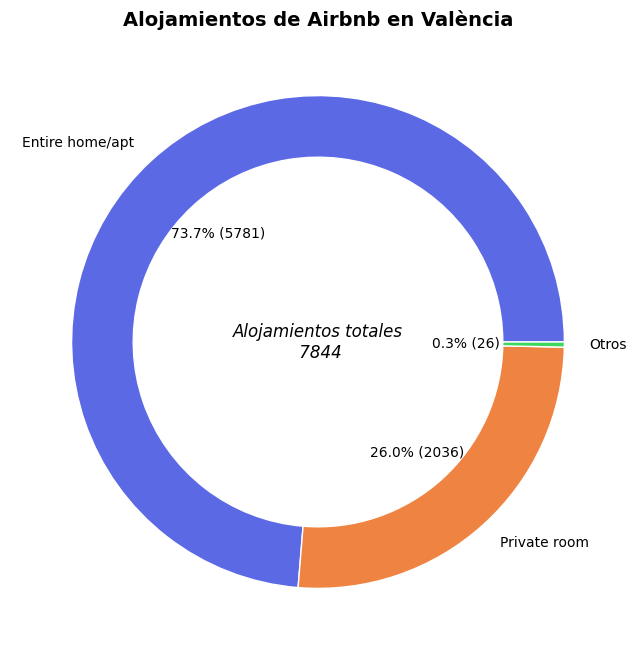

In [17]:
#Gráfico de alojamientos por tipos

tipos_alojamiento = df_sep_25["room_type"].value_counts()
tipos_alojamiento["Otros"] = tipos_alojamiento.get("Shared room", 0) + tipos_alojamiento.get("Hotel room", 0)
tipos_alojamiento = tipos_alojamiento.drop(["Shared room", "Hotel room"], errors="ignore")

fig, ax = plt.subplots(figsize= (8,8))

ax.pie(tipos_alojamiento.values,
       labels=tipos_alojamiento.index,
       wedgeprops={'edgecolor': 'white', "width":0.25},
       autopct=lambda pct: f"{pct:.1f}% ({int(pct/100.*sum(tipos_alojamiento.values))})",
       textprops={'fontsize': 10},
       colors = ["#5C69E5", "#EF8442", "#3DD65E"])

ax.text(0, 0, f'Alojamientos totales\n {len(df_sep_25)}', ha='center', va='center', fontsize=12, style="italic")

plt.title("Alojamientos de Airbnb en València", fontsize=14, fontweight='bold')

plt.show()

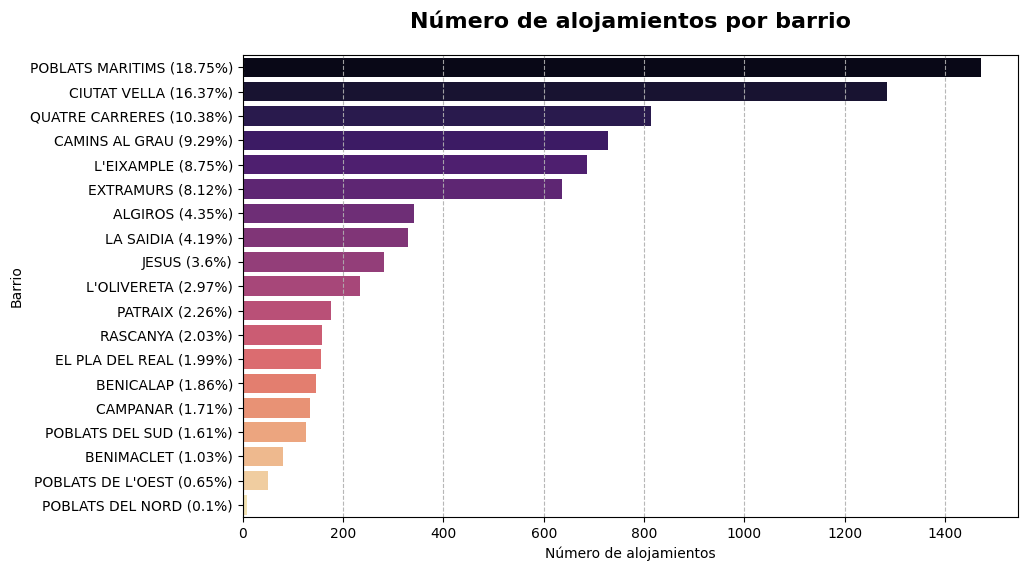

In [18]:
#Gráfico de alojamientos por barrio

alojamientos_barrio = df_sep_25["neighbourhood_group_cleansed"].value_counts().reset_index()
alojamientos_barrio.columns = ["Barrio", "Alojamientos por barrio"]

total_alojamientos_sep_25 = alojamientos_barrio["Alojamientos por barrio"].sum()
alojamientos_barrio["Porcentaje"] = (alojamientos_barrio["Alojamientos por barrio"] / total_alojamientos_sep_25 * 100).round(2)
alojamientos_barrio["Barrio_y_porcentaje"] = alojamientos_barrio.apply(lambda row: f"{row['Barrio']} ({row['Porcentaje']}%)", axis=1)

plt.figure(figsize=(10,6))
sns.barplot(
    data= alojamientos_barrio,
    x="Alojamientos por barrio",
    y="Barrio_y_porcentaje",
    palette="magma",
    hue="Barrio_y_porcentaje"
)

plt.title("Número de alojamientos por barrio", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Número de alojamientos")
plt.ylabel("Barrio")
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.show()

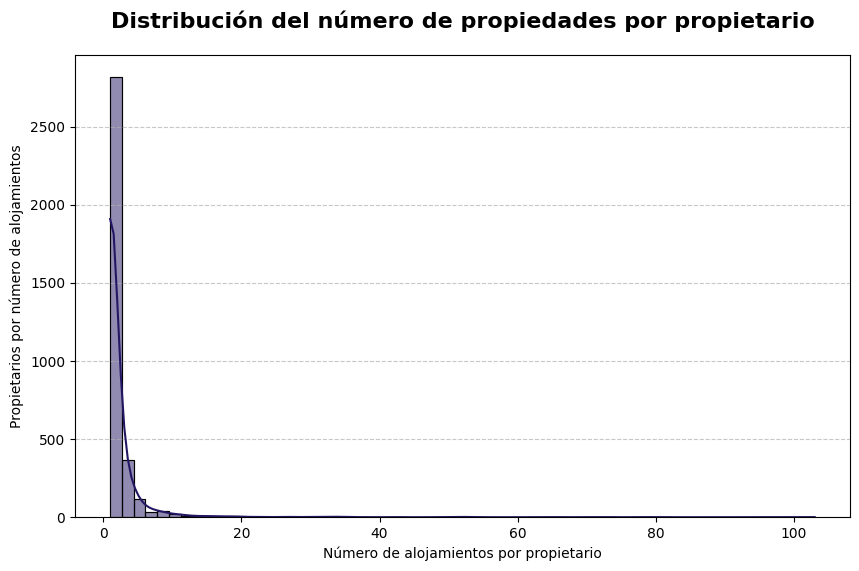

In [19]:
# Gáfico de distribución de propietarios 

alojamientos_por_propietario = df_sep_25[["host_id", "calculated_host_listings_count"]].drop_duplicates()

plt.figure(figsize=(10,6))
sns.histplot(
    alojamientos_por_propietario["calculated_host_listings_count"],
    bins=60,
    kde=True,
    color="#251664",
)
plt.title("Distribución del número de propiedades por propietario", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Número de alojamientos por propietario")
plt.ylabel("Propietarios por número de alojamientos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

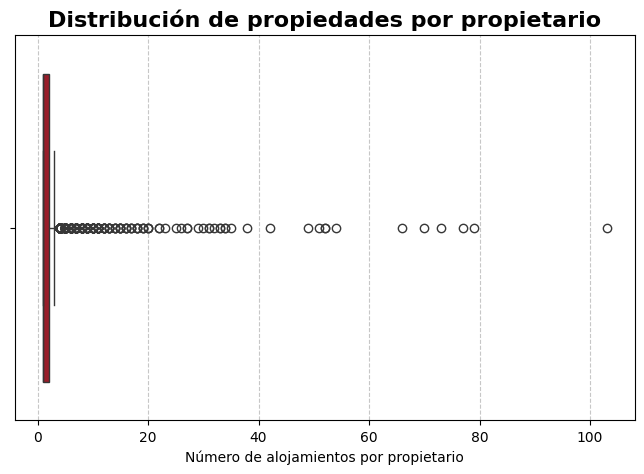

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x=alojamientos_por_propietario["calculated_host_listings_count"],
    color="#AE0919"
)
plt.xlabel("Número de alojamientos por propietario")
plt.title("Distribución de propiedades por propietario", fontsize=16, fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [21]:
# Para ver la evolución necesitaré trabajar con el todos los datasets por lo que voy a crear un DataFrame único
# Como hay alojamientos repetidos, también hay valores repetidos en las mismas columnas, por lo tanto y para poder diferenciar y tener claro
# en que momento hay tales caracteristicas, voy a crear una columna que se llame fecha

df_dic_24["fecha"] = "dic_24"
df_mar_25["fecha"] = "mar_25"
df_jun_25["fecha"] = "jun_25"
df_sep_25["fecha"] = "sep_25"

df_Airbnb= pd.concat([df_dic_24, df_mar_25, df_jun_25, df_sep_25], ignore_index=True)

orden_fechas = ["dic_24", "mar_25", "jun_25", "sep_25"]
df_Airbnb['fecha'] = pd.Categorical(df_Airbnb['fecha'], categories=orden_fechas, ordered=True)

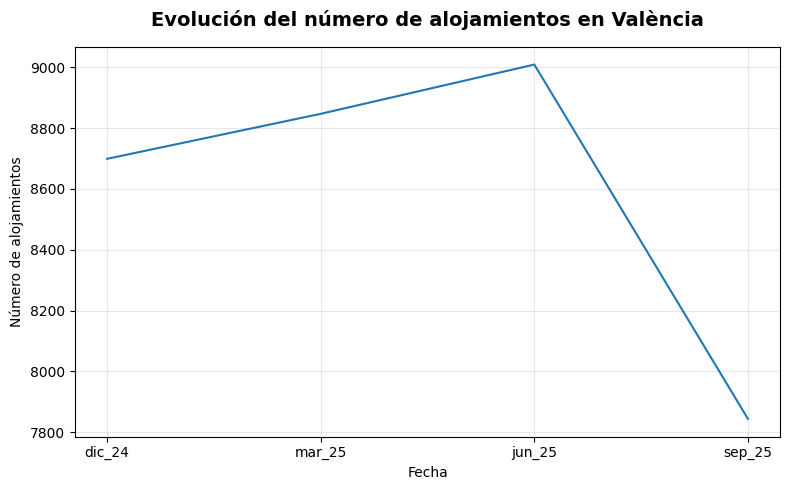

In [22]:
# Voy a crear un gráfico en el que se veo la evolución de alojamientos en València en total y por tipos

total_alojamientos = df_Airbnb.groupby("fecha", observed=False).size().reset_index(name="Alojamientos")
total_alojamientos

plt.figure(figsize=(8,5))
sns.lineplot(x="fecha", y="Alojamientos", data=total_alojamientos)
plt.title("Evolución del número de alojamientos en València", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Fecha")
plt.ylabel("Número de alojamientos")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



C:\Users\Albert\AppData\Local\Temp\ipykernel_27332\1463579726.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = alojamientos_por_propietario.groupby('rango')['calculated_host_listings_count'].agg(
C:\Users\Albert\AppData\Local\Temp\ipykernel_27332\1463579726.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = alojamientos_por_propietario.groupby('rango')['calculated_host_listings_count'].agg(
C:\Users\Albert\AppData\Local\Temp\ipykernel_27332\1463579726.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obse

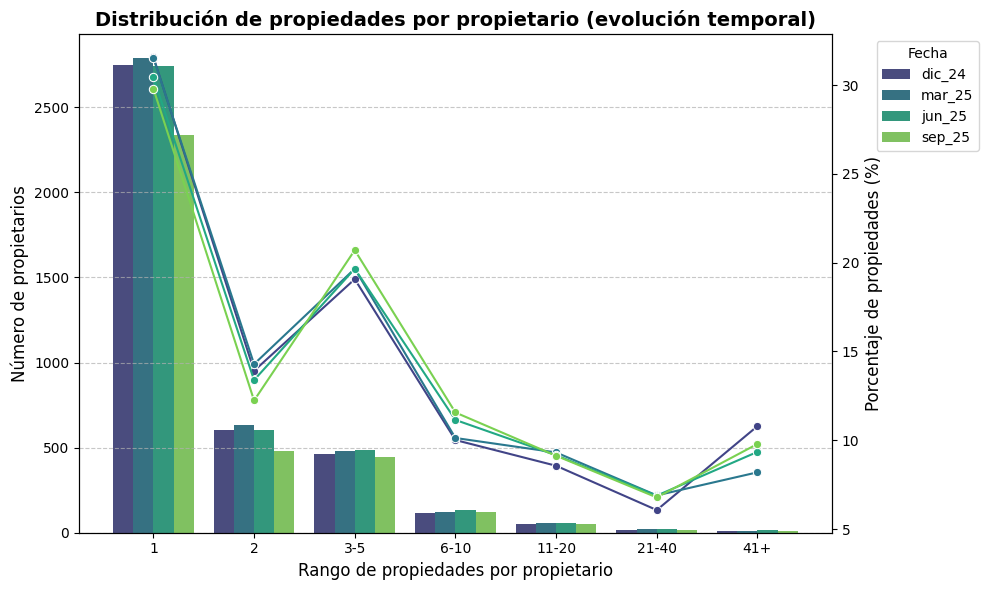

In [23]:
bins = [0, 1, 2, 5, 10, 20, 40, float('inf')]
labels = ['1', '2', '3-5', '6-10', '11-20', '21-40', '41+']

datasets = [
    ('dic_24', df_dic_24),
    ('mar_25', df_mar_25),
    ('jun_25', df_jun_25),
    ('sep_25', df_sep_25)
]

resumenes = []

for fecha, df in datasets:
    alojamientos_por_propietario = df.groupby('host_id', as_index=False)['calculated_host_listings_count'].max()

    alojamientos_por_propietario['rango'] = pd.cut(
        alojamientos_por_propietario['calculated_host_listings_count'],
        bins=bins,
        labels=labels,
        right=True
    )

    resumen = alojamientos_por_propietario.groupby('rango')['calculated_host_listings_count'].agg(
        propietarios='count',
        propiedades='sum'
    ).reset_index()

    resumen['porcentaje_propiedades'] = resumen['propiedades'] / resumen['propiedades'].sum() * 100
    resumen['fecha'] = fecha
    resumenes.append(resumen)

df_resumen_total = pd.concat(resumenes, ignore_index=True)


fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(
    data=df_resumen_total,
    x='rango',
    y='propietarios',
    hue='fecha',
    ax=ax1,
    palette='viridis'
)

ax1.set_ylabel('Número de propietarios', fontsize=12)
ax1.set_xlabel('Rango de propiedades por propietario', fontsize=12)
ax1.set_title('Distribución de propiedades por propietario (evolución temporal)', fontsize=14, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()

sns.lineplot(
    data=df_resumen_total,
    x='rango',
    y='porcentaje_propiedades',
    hue='fecha',
    marker='o',
    ax=ax2,
    legend=False,
    palette='viridis'
)

ax2.set_ylabel('Porcentaje de propiedades (%)', fontsize=12)

ax1.legend(title='Fecha', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Viviendas que aparecen en todos los periodos: 5347


C:\Users\Albert\AppData\Local\Temp\ipykernel_27332\1042481444.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evolucion_precios = df_comunes.groupby(['fecha', 'rango'], as_index=False)['price'].mean()


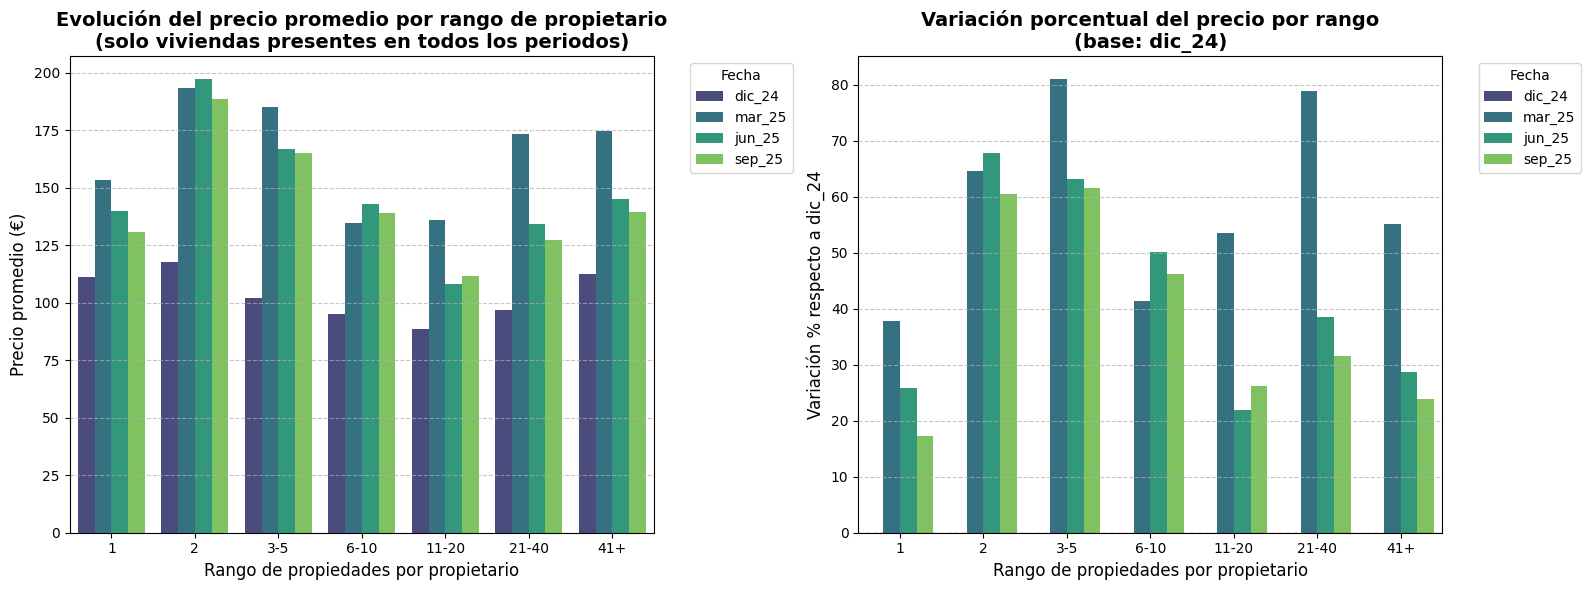


Resumen de precios promedio por rango y fecha:
fecha  dic_24  mar_25  jun_25  sep_25
rango                                
1      111.39  153.61  140.11  130.70
2      117.58  193.64  197.36  188.69
3-5    102.25  185.12  166.84  165.21
6-10    95.14  134.52  142.94  139.14
11-20   88.64  136.10  108.13  111.88
21-40   96.90  173.29  134.29  127.44
41+    112.69  174.77  145.14  139.71

Variación porcentual respecto a dic_24:
fecha  dic_24  mar_25  jun_25  sep_25
rango                                
1         0.0   37.90   25.78   17.33
2         0.0   64.69   67.84   60.47
3-5       0.0   81.04   63.17   61.58
6-10      0.0   41.39   50.23   46.24
11-20     0.0   53.53   21.99   26.22
21-40     0.0   78.83   38.58   31.51
41+       0.0   55.09   28.79   23.97


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identificar viviendas que aparecen en TODOS los periodos
ids_comunes = set(df_dic_24['id'])
for df in [df_mar_25, df_jun_25, df_sep_25]:
    ids_comunes = ids_comunes.intersection(set(df['id']))

print(f"Viviendas que aparecen en todos los periodos: {len(ids_comunes)}")

# 2. Filtrar solo las viviendas comunes
datasets_filtrados = []
for fecha, df in datasets:
    df_filtrado = df[df['id'].isin(ids_comunes)].copy()
    df_filtrado['fecha'] = fecha
    datasets_filtrados.append(df_filtrado)

df_comunes = pd.concat(datasets_filtrados, ignore_index=True)
df_comunes['price'] = (
    df_comunes['price']
    .replace('[\$,€]', '', regex=True)  # elimina $ o €
    .replace(',', '', regex=True)       # elimina comas (separador de miles)
    .astype(float))

# 3. Asignar rango según el número de propiedades del host en el primer periodo (dic_24)
# Para mantener consistencia en la clasificación
host_rango_inicial = df_dic_24.groupby('host_id', as_index=False)['calculated_host_listings_count'].max()
host_rango_inicial['rango'] = pd.cut(
    host_rango_inicial['calculated_host_listings_count'],
    bins=bins,
    labels=labels,
    right=True
)

# Mapear el rango a todas las fechas
df_comunes = df_comunes.merge(
    host_rango_inicial[['host_id', 'rango']], 
    on='host_id', 
    how='left'
)

# 4. Calcular precio promedio por rango y fecha
evolucion_precios = df_comunes.groupby(['fecha', 'rango'], as_index=False)['price'].mean()
evolucion_precios.columns = ['fecha', 'rango', 'precio_promedio']

# 5. Calcular variación porcentual respecto a dic_24
precio_base = evolucion_precios[evolucion_precios['fecha'] == 'dic_24'][['rango', 'precio_promedio']]
precio_base.columns = ['rango', 'precio_base']

evolucion_precios = evolucion_precios.merge(precio_base, on='rango', how='left')
evolucion_precios['variacion_porcentual'] = (
    (evolucion_precios['precio_promedio'] - evolucion_precios['precio_base']) / 
    evolucion_precios['precio_base'] * 100
)

# 🔹 Ordenar categorías de 'rango' y 'fecha'
orden_rangos = ['1', '2', '3-5', '6-10', '11-20', '21-40', '41+']
orden_fechas = ['dic_24', 'mar_25', 'jun_25', 'sep_25']

evolucion_precios['rango'] = pd.Categorical(
    evolucion_precios['rango'],
    categories=orden_rangos,
    ordered=True
)
evolucion_precios['fecha'] = pd.Categorical(
    evolucion_precios['fecha'],
    categories=orden_fechas,
    ordered=True
)

# Reordenar el DataFrame según esas categorías
evolucion_precios = evolucion_precios.sort_values(['rango', 'fecha'])
# 6. Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Precio promedio absoluto
sns.barplot(
    data=evolucion_precios,
    x='rango',
    y='precio_promedio',
    hue='fecha',
    ax=axes[0],
    palette='viridis'
)
axes[0].set_ylabel('Precio promedio (€)', fontsize=12)
axes[0].set_xlabel('Rango de propiedades por propietario', fontsize=12)
axes[0].set_title('Evolución del precio promedio por rango de propietario\n(solo viviendas presentes en todos los periodos)', 
                  fontsize=14, fontweight='bold')
axes[0].legend(title='Fecha', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Variación porcentual
variacion_sin_base = evolucion_precios[evolucion_precios['fecha'] != 'dic_24']
sns.barplot(
    data=variacion_sin_base,
    x='rango',
    y='variacion_porcentual',
    hue='fecha',
    ax=axes[1],
    palette='viridis'
)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
axes[1].set_ylabel('Variación % respecto a dic_24', fontsize=12)
axes[1].set_xlabel('Rango de propiedades por propietario', fontsize=12)
axes[1].set_title('Variación porcentual del precio por rango\n(base: dic_24)', 
                  fontsize=14, fontweight='bold')
axes[1].legend(title='Fecha', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 7. Tabla resumen
print("\nResumen de precios promedio por rango y fecha:")
pivot_precios = evolucion_precios.pivot(index='rango', columns='fecha', values='precio_promedio')
print(pivot_precios.round(2))

print("\nVariación porcentual respecto a dic_24:")
pivot_variacion = evolucion_precios.pivot(index='rango', columns='fecha', values='variacion_porcentual')
print(pivot_variacion.round(2))

In [ ]:
# Contar cuántas viviendas hay por rango en el análisis
viviendas_por_rango = df_comunes[df_comunes['fecha'] == 'dic_24'].groupby('rango').size()
print("\nNúmero de viviendas comunes analizadas por rango:")
print(viviendas_por_rango)

# Desviación estándar de precios por rango
std_precios = df_comunes.groupby(['fecha', 'rango'])['price'].std().reset_index()
print("\nDesviación estándar de precios:")
print(std_precios.pivot(index='rango', columns='fecha', values='price').round(2))


Número de viviendas comunes analizadas por rango:
rango
1        1571
2         707
3-5      1075
6-10      543
11-20     534
21-40     401
41+       516
dtype: int64

Desviación estándar de precios:
fecha  dic_24  jun_25  mar_25  sep_25
rango                                
1      102.86  455.95  456.98  385.48
2      457.32  888.70  826.25  875.34
3-5    112.12  652.24  657.74  663.06
6-10    59.26  216.32   75.81  203.71
11-20   84.36   81.61  193.91   90.93
21-40   66.22   81.32  324.65   69.77
41+     64.67   61.56   93.60   56.36


C:\Users\Albert\AppData\Local\Temp\ipykernel_43556\3520013842.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  viviendas_por_rango = df_comunes[df_comunes['fecha'] == 'dic_24'].groupby('rango').size()
C:\Users\Albert\AppData\Local\Temp\ipykernel_43556\3520013842.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_precios = df_comunes.groupby(['fecha', 'rango'])['price'].std().reset_index()


In [ ]:
# Evolución porcentual de los precios de los alojamientos, los alojamientos comparados consigo mismos, promediado por rango de conentracion de alojamientos por propietario

In [ ]:
# El rango de propietarios que maneja el mercado parece ser que es el de aquellos propietarios que tienen entre 3 y 5 propiedades
# A pesar de lo que se podia pensar al principio no se trata de los grandes propietarios ya que no tienen el suficiente poder de mercado para imponer precio
# Pero tampoco hay que descartarlos, ya que junto con los pequeños propietarios son los que mas augmentan su proporcion de propiedades

In [ ]:
'''
1. Incremento generalizado de precios en todos los rangos

Todos los rangos han experimentado aumentos significativos de precio
El incremento mínimo es del 17.33% (propietarios con 1 propiedad en sep_25)
El incremento máximo es del 81.04% (propietarios con 3-5 propiedades en mar_25)

2. Patrón estacional claro: Pico en marzo

Marzo 2025 es consistentemente el mes con mayores precios en todos los rangos
Las variaciones en mar_25 oscilan entre 37.90% y 81.04%
Esto sugiere una estrategia de precios premium en temporada alta (primavera)

3. Los propietarios pequeños (1-5 propiedades) suben más los precios
Variación promedio por tipo de propietario en mar_25:

1 propiedad: +37.90%
2 propiedades: +64.69%
3-5 propiedades: +81.04% ← MÁS AGRESIVOS
6-10 propiedades: +41.39%
11-20 propiedades: +53.53%
21-40 propiedades: +78.83%
41+ propiedades: +55.09%

Los pequeños/medianos propietarios son más agresivos con los precios estacionales
4. Los grandes propietarios (6-10 y 41+) son más conservadores

Propietarios con 6-10 propiedades: incrementos del 41-50%
Propietarios con 41+ propiedades: incrementos del 24-55%
Mantienen precios más estables, posiblemente para maximizar ocupación

5. Corrección de precios en septiembre

Todos los rangos reducen precios respecto a marzo
Pero permanecen muy por encima de diciembre 2024 (17-61%)
Patrón de ajuste post-temporada alta

6. Comportamiento anómalo: Propietarios con 1 propiedad

Son los que menos suben precios en todos los periodos
En sep_25 solo +17.33% (el más bajo de todos)
Hipótesis: Propietarios particulares menos profesionalizados o necesidad de ingresos constantes

7. Estrategia diferenciada por tamaño de cartera
Pequeños propietarios (1-2):

Incrementos moderados (+17% a +65%)
Menos volatilidad

Medianos propietarios (3-40):

MÁS AGRESIVOS con precios estacionales (+61% a +81%)
Mayor optimización de ingresos por temporada

Grandes propietarios (41+):

Incrementos moderados-altos (+24% a +55%)
Estrategia equilibrada entre precio y ocupación

8. Paradoja del precio base (dic_24)
Curiosamente, en diciembre 2024:

Propietarios con 11-20 propiedades: precio más bajo (88.64€)
Propietarios con 2 propiedades: precio más alto (117.58€)

Esto se invierte en temporada alta, sugiriendo que los profesionales ajustan más dinámicamente.
Conclusiones estratégicas:

Alta profesionalización del mercado: Los incrementos del 25-81% indican gestión dinámica de precios
Segmentación clara: Propietarios medianos (3-40 props) son los más agresivos
Estacionalidad marcada: Marzo = precios premium, estrategia clara de yield management
Mercado polarizado: Comportamiento muy diferente entre pequeños, medianos y grandes
Posible presión sobre demanda: Incrementos tan altos podrían afectar ocupación (necesitarías datos de reviews/ocupación para confirmarlo)

'''

